In [2]:
import pandas as pd
import numpy as np
from custom_detrending import custom_detrending, refine_detrended_flux_err

import matplotlib.pyplot as plt
%matplotlib inline

from altaipony.lcio import from_path, from_mast

from copy import deepcopy

In [ ]:
flc = from_mast("EPIC 212009190", c=18, mission="K2", mode="TPF")

In [ ]:
flcd.to_fits("EPIC212009190_C18_bigSSO.fits")

In [ ]:
flcd = flc.detrend("k2sc")

In [ ]:
flcd = from_path("EPIC212009190_C18_bigSSO.fits", mission="K2", mode="AltaiPony")

In [3]:
EPIC = 200200517






C = 16
flc = from_path(f"../k2scoc/pony_k2sc_k2_llc_{EPIC}-c{C:02d}_kepler_v2_lc.fits", mode="AltaiPony", mission="K2")

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-0.0.1-py3.6.egg/altaipony/lcio.py:139: ResourceWarning: unclosed file <_io.FileIO name='../k2scoc/pony_k2sc_k2_llc_200200517-c16_kepler_v2_lc.fits' mode='rb' closefd=True>
  return _from_path_AltaiPony(path)


In [4]:
flcd = deepcopy(flc)
flcd.flux = flc.detrended_flux

#flcd = flcd[(flcd.time<2281) | (flcd.time>2282)]
#flcd = flcd[(flcd.time<2287) | (flcd.time>2288)]
flcd = flcd[~np.isnan(flcd.flux) & ~np.isnan(flcd.flux_err) & ~np.isnan(flcd.time)]
flcd = refine_detrended_flux_err(flcd)


In [5]:
flcd = custom_detrending(flcd)

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


SNR at  0.7865908940704515
SNR at  4.401979058752457
4.401979058752457
4.401979058752457
4.401979058752457
5.223910113677915
5.223910113677915
5.282703989937315
5.282703989937315
2.5852668766956053
2.5852668766956053
2.6574505379009037
2.6574505379009037
2.2649686940266647
2.2649686940266647
2.4071342739101116
2.4071342739101116
2.425472739636281
2.425472739636281
2.3428351413936
2.3428351413936
2.4222928888677657
SNR at  0.9213241111592253
SNR at  1.6668631058391763
1.6668631058391763
1.6668631058391763
1.6668631058391763
0.9707556633734562
SNR at  5.773128586282575
5.773128586282575
5.773128586282575
5.773128586282575
7.880813227891034
7.880813227891034
4.300991966710317
4.300991966710317
3.234425638431021
3.234425638431021
3.1694905547161425
3.1694905547161425
3.1461836210677627
3.1461836210677627
3.133453374224107
3.133453374224107
3.108128856529876
3.108128856529876
3.1158385402315187
3.1158385402315187
3.08128853634282


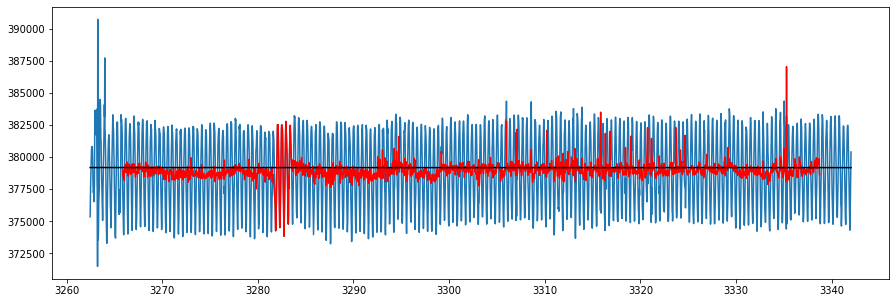

In [6]:
plt.figure(figsize=(15,5))
plt.plot(flc.time, flc.detrended_flux)
#plt.plot(flc.time, flc.flux)
plt.plot(flcd.time, flcd.detrended_flux, c="r");
plt.plot(flc.time, np.nanmedian(flc.detrended_flux)+3*flc.detrended_flux_err, c="k");
#plt.xlim(3460,3475)
#plt.ylim(23000, 27000)

In [ ]:
flcd.detrended_flux_err[:] = np.nanmedian(flcd.detrended_flux_err)

In [ ]:
flc = refine_detrended_flux_err(flc)

In [8]:
flares = flcd.find_flares().flares
flares

Found 0 candidate(s) in the (0,719) gap.
Found 0 candidate(s) in the (719,792) gap.
Found 0 candidate(s) in the (792,896) gap.
Found 6 candidate(s) in the (896,3346) gap.


,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,total_n_valid_data_points
0,2262,2265,156925.0,156928.0,3315.477340,3315.538647,10.820292,1.872270,0.002364,3346.0
1,2423,2426,157097.0,157101.0,3318.992239,3319.073981,38.487512,3.523342,0.007096,3346.0
2,2500,2503,157181.0,157185.0,3320.708814,3320.790555,49.076200,4.349715,0.008815,3346.0
3,2658,2662,157348.0,157353.0,3324.121519,3324.223696,28.170529,2.270998,0.004204,3346.0
4,2681,2685,157372.0,157377.0,3324.611967,3324.714144,47.759539,3.800291,0.007238,3346.0
5,2908,2917,157610.0,157619.0,3329.475562,3329.659479,19.574282,1.434845,0.001493,3346.0


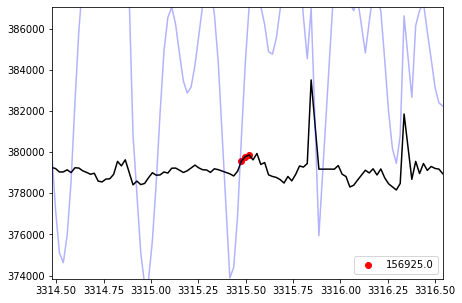

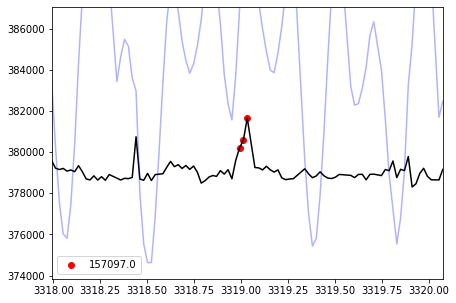

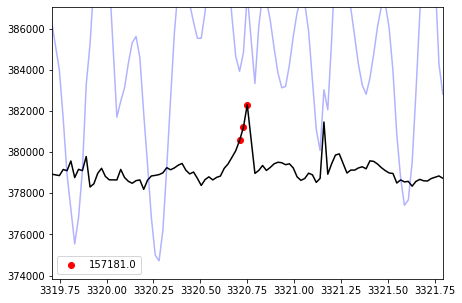

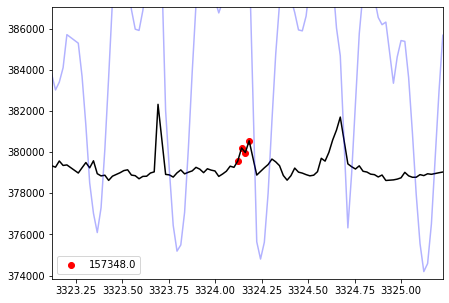

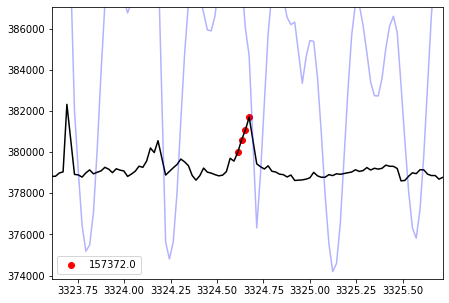

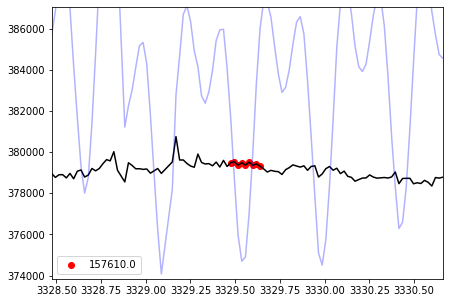

In [9]:
for i, r in flares.iterrows():
    plt.figure(figsize=(7,5))
    plt.plot(flcd.time, flcd.detrended_flux,c="k")
    plt.plot(flc.time, flc.flux,c="b", alpha=.3)
    sta, sto = int(r.istart), int(r.istop)
    plt.scatter(flcd.time[sta:sto], flcd.detrended_flux[sta:sto], c="r", label=r.cstart)#, label=f"EPIC {EPIC}, C{C}")#
    plt.xlim(r.tstart-1,r.tstop+1)
    plt.ylim(np.nanmin(1.*flcd.detrended_flux),1.*np.nanmax(flcd.detrended_flux))
    plt.legend()

In [10]:
with open("../k2scoc/results/tables/custom_detrended_flares.csv", "a") as f:
    flares["C"] = C
    flares["EPIC"] = EPIC
    flares.to_csv(f,index=False, header=False)

In [ ]:
from lightkurve import search_lightcurvefile, search_targetpixelfile

In [ ]:
lcs = search_lightcurvefile("GJ 1151")